# Visualizations of Save Our Shores Cleanup Data 2013-2022

The data consisted of 1-2 xslx files per year, with a wide variety of item names, types and site names, so I wrote some functions to clean up the data.

In [57]:
import circlify
import glob
import numpy as np
import os
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from pprint import pprint
import tabulate

import cleanup as cleanup 
import plots as plots

Read all file and combines them into one if file isn't already saved

In [58]:
data_dir = '/Users/jenny.folkesson/Data/SOS Cleanup Data 2013-2022'
existing_file = glob.glob(os.path.join(data_dir, 'merged_sos_data.csv'))
if len(existing_file) == 1:
    sos_data = pd.read_csv(existing_file[0])
else:
    sos_data = cleanup.merge_data(data_dir)
    sos_data.to_csv(os.path.join(data_dir, "merged_sos_data.csv"), index=False)

These are the column names.

In [59]:
pprint(list(sos_data))

['Date',
 'Data Collection',
 'Duration (Hrs)',
 'County/City',
 'Cleanup Site',
 'Cleaned Size (Sq Miles)',
 'Adult Volunteers',
 'Youth Volunteers',
 'Pounds Of Trash',
 'Pounds Of Recycling',
 'Type Of Cleanup',
 'Cigarette Butts',
 'Plastic Pieces',
 'Plastic Food Wrappers',
 'Plastic To-Go Items',
 'Paper Pieces',
 'Balloons',
 'Plastic Bottles',
 'Beach Toys/Accessories',
 'Glass Bottles',
 'Glass Pieces',
 'Bandaids',
 'Batteries',
 'Personal Hygiene',
 'Bagged Pet Waste',
 'PPE',
 'Wood Pieces',
 'Clothes/Cloth',
 'Plastic Lids',
 'Utensils',
 'Rope',
 '6-Pack Holders',
 'Strapping Bands',
 'Beverage Pouches',
 'Appliances',
 'Cigar Tips',
 'Construction Materials',
 'Fireworks',
 'Tires',
 'Other',
 'Other.1',
 'Other.2',
 'Other.3',
 'Plastic Bags',
 'Bottle Caps',
 'Paper/Cardboard',
 'Cans',
 'E-Waste',
 'Fishing Gear',
 'Food Containers',
 'Lighters',
 'Metal Nails',
 'Plastic Packaging',
 'Smoking/Tobacco',
 'Straws/Stirrers',
 'Syringes/Needles',
 'Aluminum Foil',
 'Foot

In [60]:
# The 'Other categories are strings and not useful in this analysis
sos_data.drop(['Other.1', 'Other.2', 'Other.3'], axis=1, inplace=True)

## Plot circle packing graph for all items collected 2013-2022

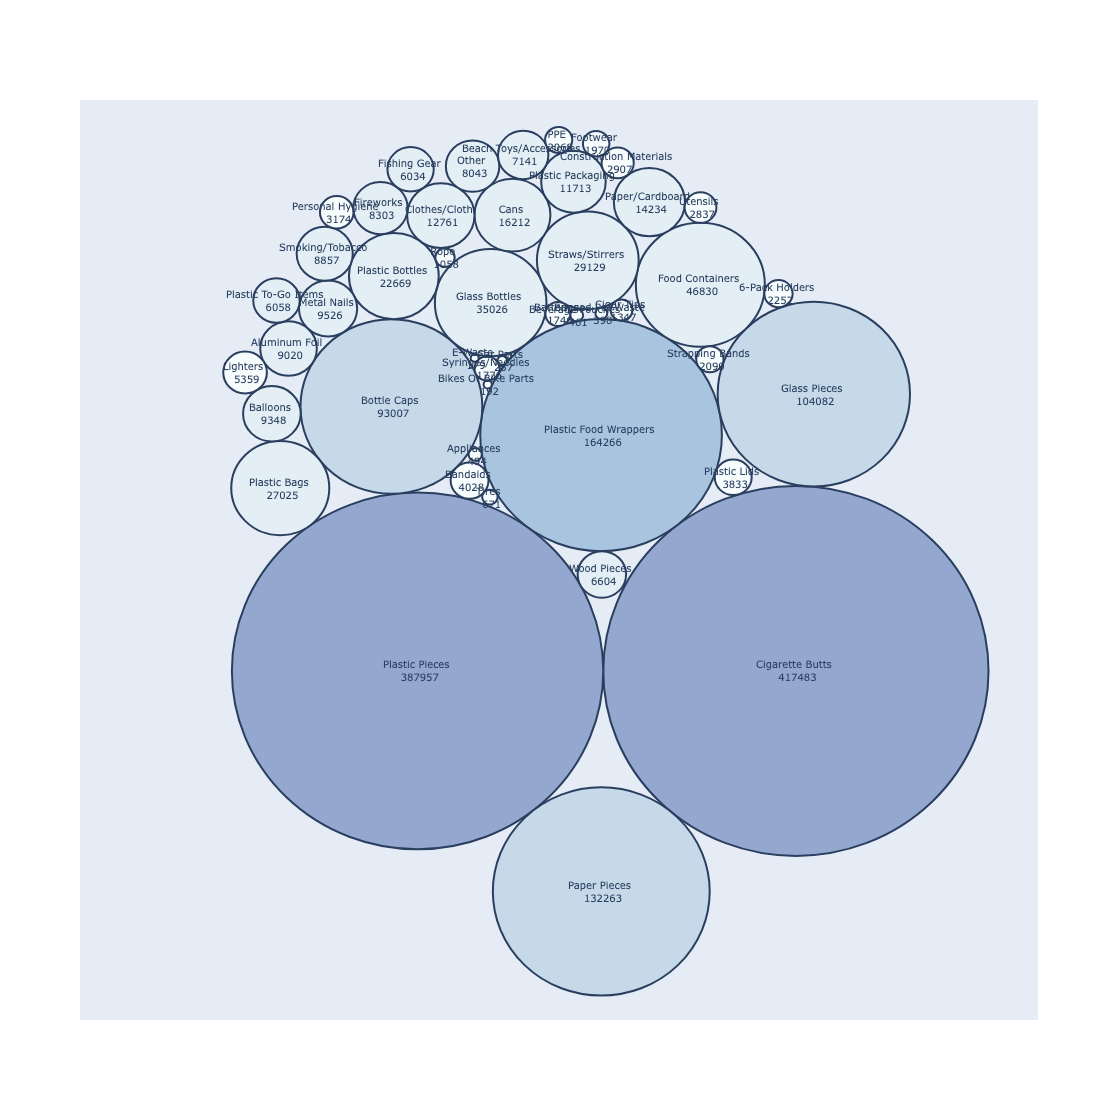

In [63]:
from importlib import reload
reload(plots)
reload(cleanup)
fig = plots.circle_packing_graph(sos_data)
fig.show()

The above graph is a circle packing graph which shows the total number of items cleaned up by Save Our Shores 2013-2022, sorted by the most common categories.

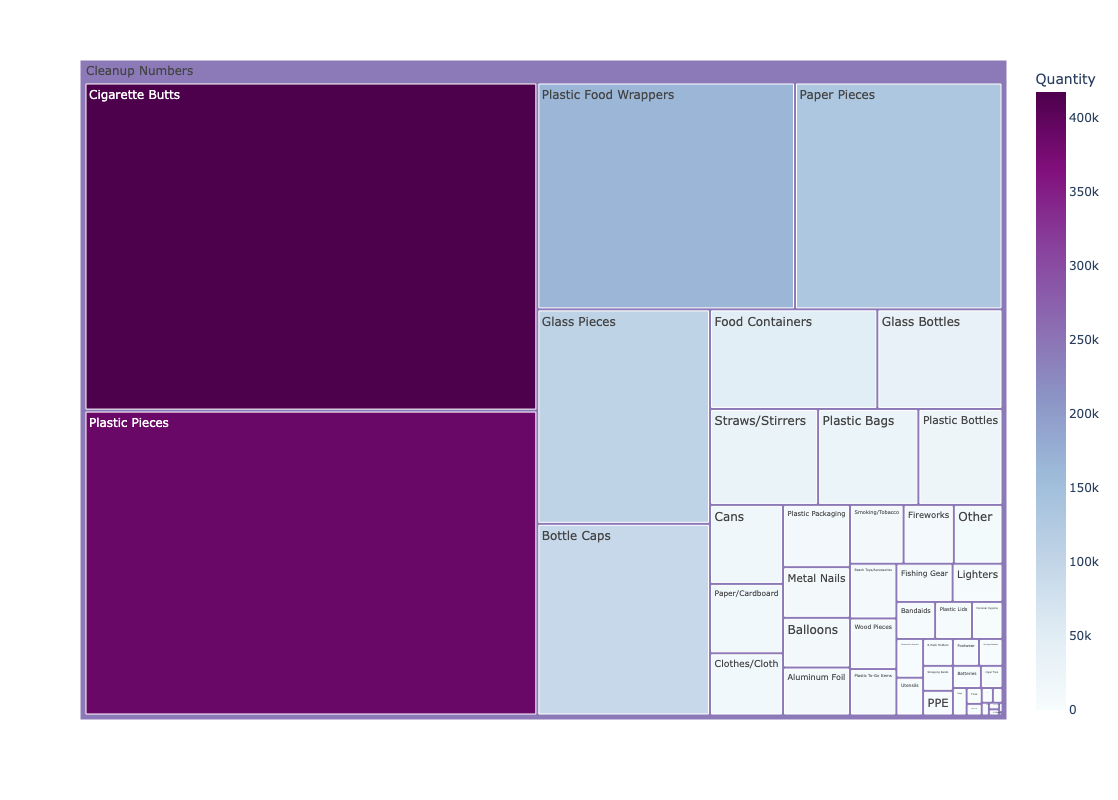

In [64]:
fig = plots.treemap_graph(sos_data)
fig.show()

The treemap graph above shows total number of items cleaned up 2013-2022 by category.

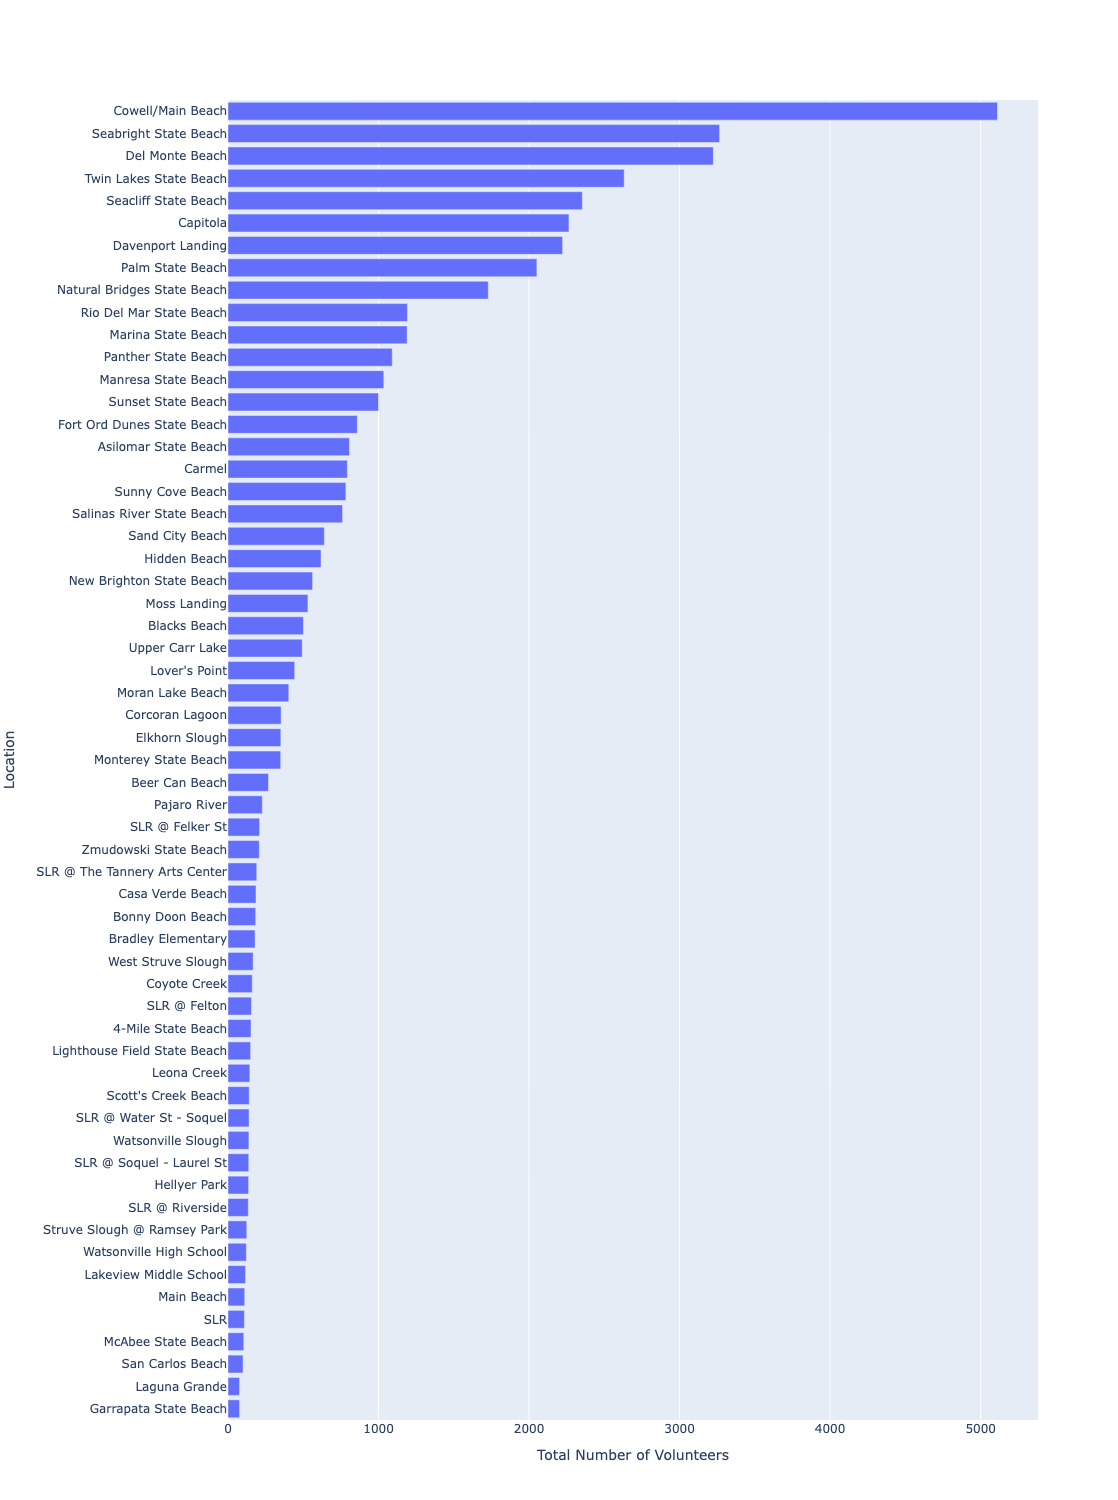

In [65]:
sos_sites = sos_data.groupby('Cleanup Site').sum()
sos_sites = sos_sites.reset_index()
# NOAA counted youth volunteers as half adult volunteers
sos_sites['Total Volunteers'] = sos_sites['Adult Volunteers'] + 0.5 * sos_sites['Youth Volunteers']
# Drop sites with no stats on volunteer numbers
sos_sites.drop(sos_sites[sos_sites['Total Volunteers'] <= 100].index, inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=sos_sites['Cleanup Site'],
    x=sos_sites['Adult Volunteers'],
    orientation='h',
    name='Total Cleanup Volunteers',
))
fig.update_layout(
    autosize=False,
    width=1100,
    height=1500,
    yaxis_title='Location',
    xaxis_title='Total Number of Volunteers',
    yaxis={'categoryorder':'total ascending'}
)
fig.show()

This figure shows the total number of volunteers that have been involved in a cleanup event 2013-2022 per cleanup site. Youth volunteers, when reported, are counted as half an adult volunteer in line with the NOAA Marine Debris Report.
Cleanup sites with less than a total of 100 volunteers are not displayed.

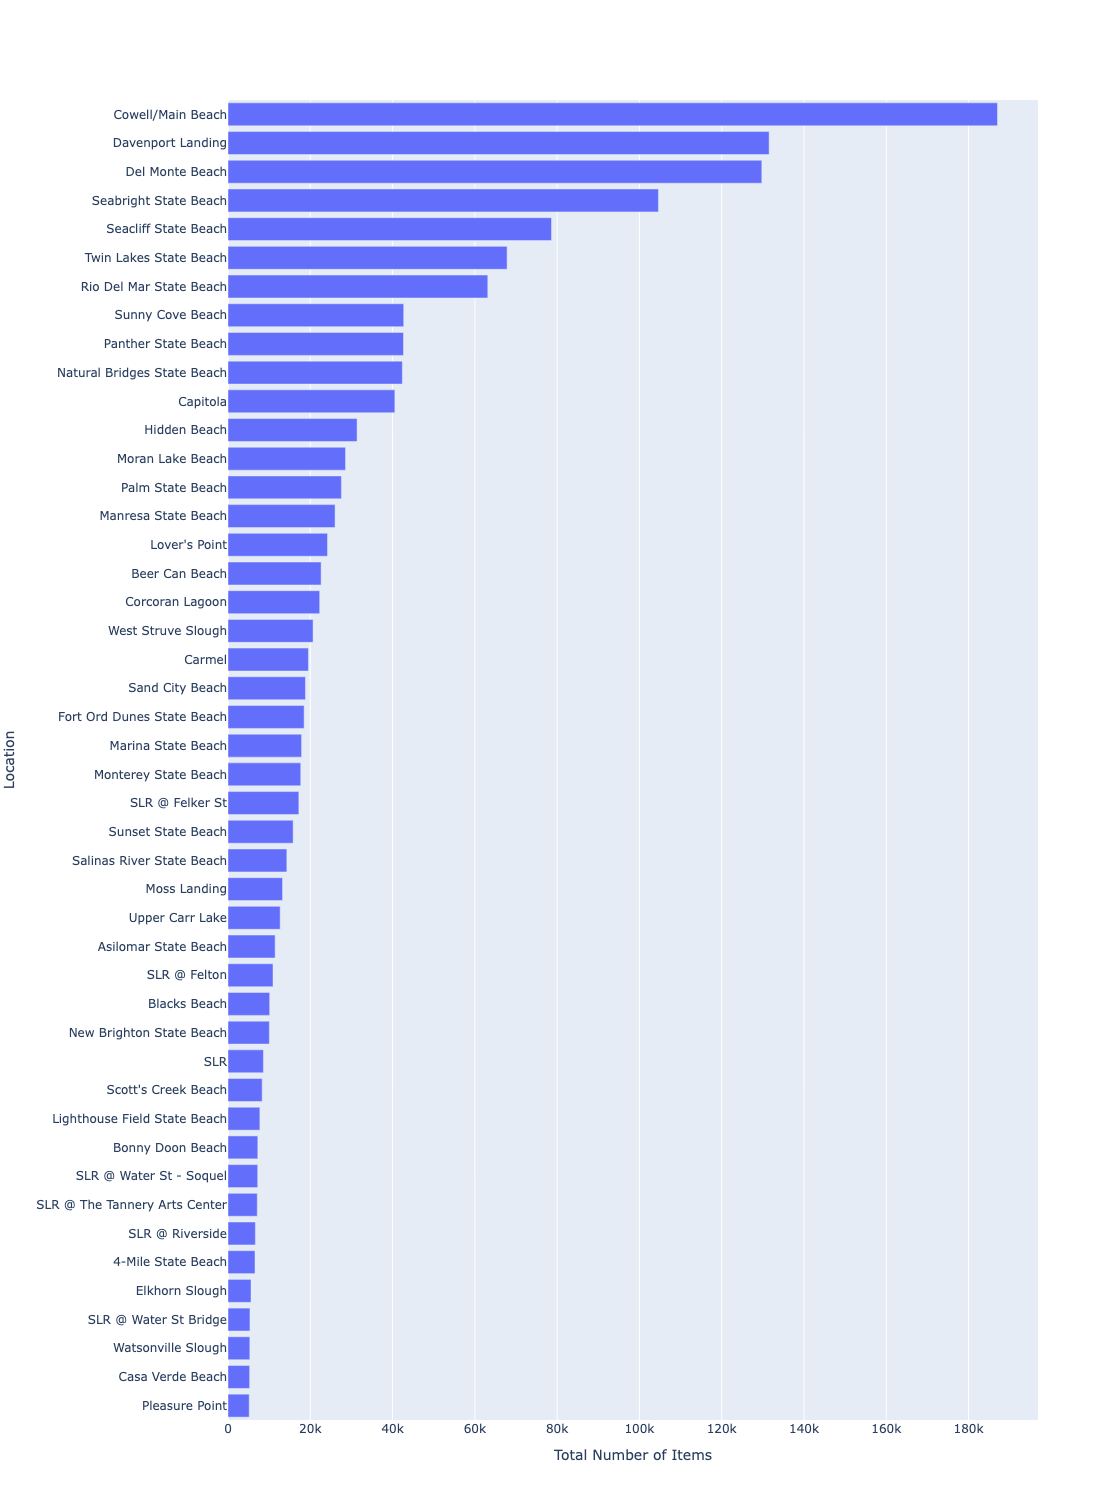

In [66]:
sos_data['Total Items'] = plots.sum_items(sos_data, col_sum=False)
sos_sites = sos_data.groupby('Cleanup Site').sum()
sos_sites = sos_sites.reset_index()
# Drop sites with no stats on volunteer numbers
sos_sites.drop(sos_sites[sos_sites['Total Items'] <= 5000].index, inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=sos_sites['Cleanup Site'],
    x=sos_sites['Total Items'],
    orientation='h',
    name='Total Number of Items Cleaned Up',
))
fig.update_layout(
    autosize=False,
    width=1100,
    height=1500,
    yaxis_title='Location',
    xaxis_title='Total Number of Items',
    yaxis={'categoryorder':'total ascending'}
)
fig.show()

Total number of items cleaned up from 2013-2022 by cleanup site. Sites with less than 5000 items are not displayed.

In [75]:
sos_data['Date'] = pd.to_datetime(sos_data['Date'], errors='coerce')
sos_data.dropna(subset=['Date'], inplace=True)

sos_data['Total Volunteers'] = sos_data['Adult Volunteers'] + 0.5 * sos_data['Youth Volunteers']

cigarette_butts = sos_data.groupby(sos_data.Date.dt.year)['Cigarette Butts'].sum()
volunteers = sos_data.groupby(sos_data.Date.dt.year)['Total Volunteers'].sum()
annual_data = pd.concat([cigarette_butts, volunteers], axis=1)

# fig = px.scatter(annual_data, x=annual_data.index, y='Cigarette Butts', size='Total Volunteers')
# fig.show()
annual_data.T.plot(kind='bar')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.